

# Casus: Invloeden bepalen
*auteur: S.A. Klop*
    
Deze casus laat zien hoe tijdreeksanalyse gebruikt kan worden om verschillende invloeden op de stijghoogte te bepalen. 
    
Hierbij wordt gekeken naar het bepalen of een externe invloed, zoals een onttrekking, een significante invloed heeft en hoe groot deze invloed is. Deze casus is opgedeeld in twee delen. In het eerste deel wordt een voorbeeld behandeld met een onttrekking. In deel II van de casus wordt gekeken naar de invloed van een waterloop op de stijghoogte. 

   
**Inhoudsopgave**

- [Deel I: Invloed peilopzet](#Deel-I:-Invloed-peilopzet)
    - [Beschikbare data](#Beschikbare-data-voorbeeld-1)
    - [Opstellen tijdreeksmodel](#Opstellen-tijdreeksmodel-voorbeeld-1)
    - [Invloed van de ingreep](#Invloed-van-de-ingreep)
- [Deel II: Invloed waterloop](#Deel-II:-Invloed-waterloop)
    - [Beschikbare data](#Beschikbare-data-voorbeeld-2)
    - [Voorbewerken reeksen](#Voorbewerken-reeksen-voorbeeld-2)
    - [Opzetten model](#Opzetten-model-voorbeeld-2)
    - [Bepalen invloed waterloop](#Bepalen-invloed-van-waterloop)





In [1]:
# inladen van de benodigde python packages
import pastas as ps
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML

%matplotlib inline
ps.set_log_level("ERROR")

%config InlineBackend.figure_format = 'retina'

## Deel I: Invloed peilopzet


Het waterschap heeft de stijghoogte gemeten in Peilbuis 1. De peilbuis bevindt zich in een gebied waar het waterschap in de zomer van 2005 maatregelen heeft genomen om de stijghoogte in het gebied te verhogen om de natuurwaarden te verbeteren. Hiervoor zijn onder andere enkele stuwen omhoog gezet en enkele watergangen gedempt.
 
10 jaar na de ingrepen wil het waterschap evalueren of de ingrepen het gewenste effect hebben gehad op de stijghoogte. Hiervoor wordt de stijghoogte in Peilbuis 1 geanalyseerd met behulp van tijdreeksanalyse.


### Beschikbare data voorbeeld 1
In de onderstaande afbeelding is de gemeten stijghoogte in Peilbuis 1 te zien. De stijghoogte is gemeten voor de periode van 1985 tot en met 2015. De stijghoogte is voor en na de ingreep gemeten. Op het eerste gezicht lijkt het alsof de stijghoogte sinds de ingrepen in de zomer van 2005 hoger is geworden.

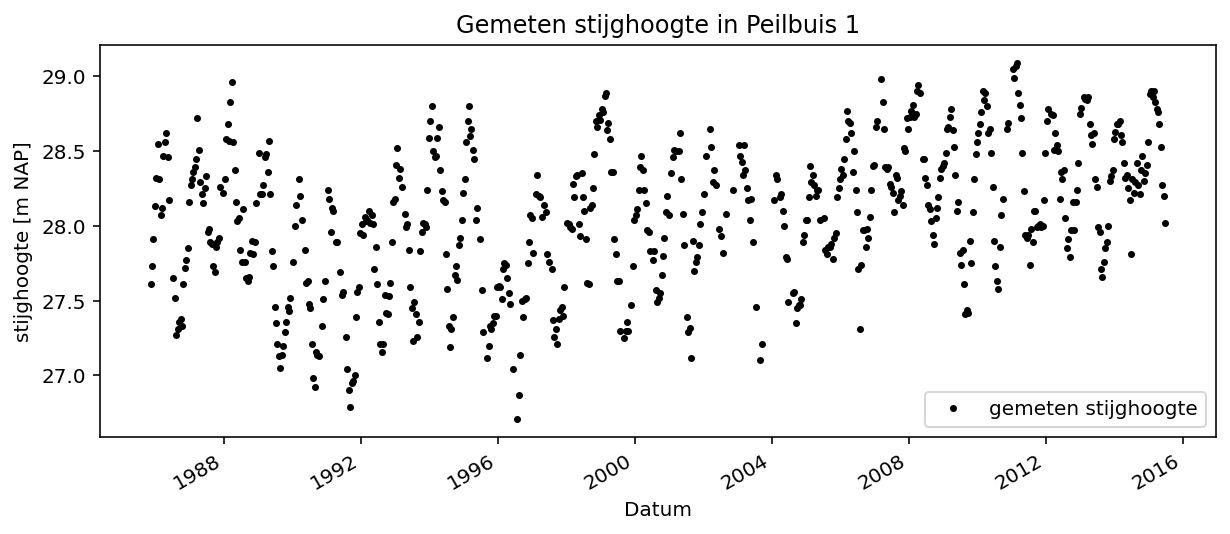

In [2]:
gws = pd.read_csv("data/head_stepex_edit.csv",
                  index_col=0, parse_dates=True)

# plotten van de stijghoogte
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
gws.plot(ax=ax, color='k', ls='', marker='.', markersize=5)

# opmaken van de figuur
ax.set_ylabel('stijghoogte [m NAP]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten stijghoogte in Peilbuis 1')
ax.legend([f'gemeten stijghoogte']);

De neerslag en verdamping ter plaatse van Peilbuis 1 worden gebruikt als verklarende reeksen. Hiervoor zijn de gegevens gebruikt van het dichtsbijzijnde weerstation van het KNMI. De neerslag en verdamping zijn te zien in de onderstaande afbeelding. 

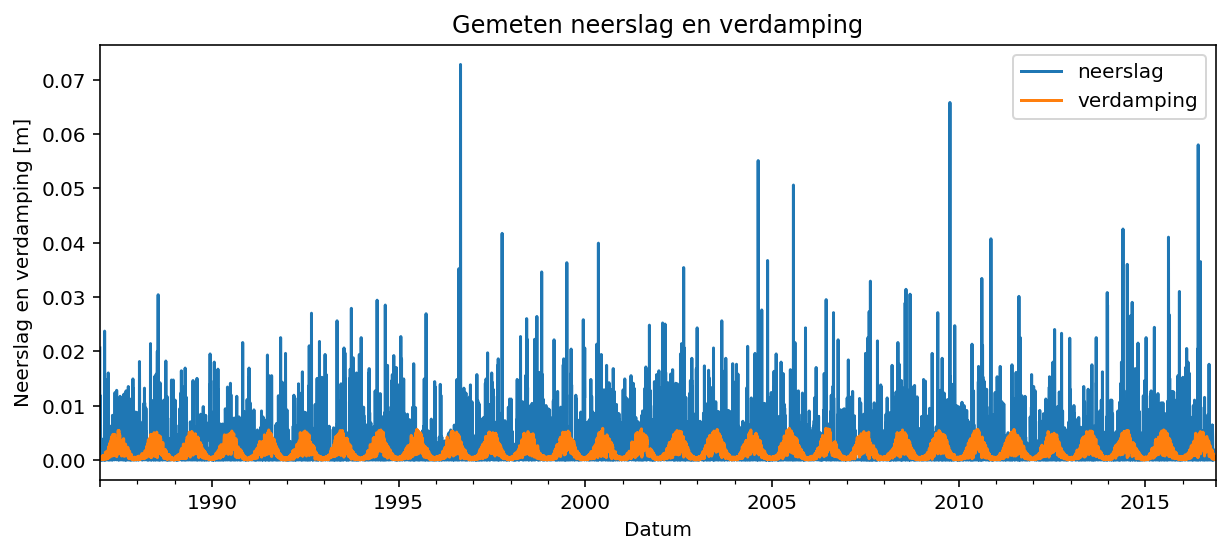

In [3]:
neerslag = pd.read_csv("data/rain_stepex.csv",
                       index_col=0, parse_dates=True)
verdamping = pd.read_csv("data/evap_stepex.csv",
                         index_col=0, parse_dates=True)

# plotten van de neerslag en verdamping
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
neerslag.plot(ax=ax, color='C0')
verdamping.plot(ax=ax, color='C1')

# opmaken van de figuur
ax.set_ylabel('Neerslag en verdamping [m]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten neerslag en verdamping')
ax.legend([f'neerslag',
          f'verdamping'])
ax.set_xlim(xmin='1987');

### Opstellen tijdreeksmodel voorbeeld 1
Er wordt een model opgesteld voor de stijghoogte observaties. Hiervoor wordt de volledige reeks gebruikt. In de reeks zijn geen uitschieters gevonden, er is daarom geen reden om de meetreeks voor te bewerken voordat deze in het model kan worden toegepast.

De neerslag en verdamping worden gebruikt als verklarende reeksen. Voor de verklarende reeksen wordt een respons gekozen. De respons functie beschrijft de reactie van de stijghoogte op een externe invloed. Deze moet worden vastgesteld voor elke verklarende reeks, waarbij de gebruiker het type respons functie kiest en waarbij de parameters van deze functie worden geoptimaliseerd. Voor het tijdreeksmodel wordt gekozen voor de Gamma respons functie voor de neerslag en verdamping. 

In het tijdreeksmodel wordt gekozen om dezelfde response functie te gebruiken voor de neerslag en de verdamping. Hierbij wordt het verband tussen de neerslag en verdamping beschreven met de formule $ R = P - f \cdot E$, waarbij $R$ de grondwateraanvulling is [m], $P$ de neerslag [m], $f$ de verdampingsfactor [-] en $E$ de verdamping [m]. De verdampingsfactor wordt door het tijdreeksmodel geoptimaliseerd. Naast de verklarende reeksen wordt ook een constante meegefit in het model.

Na het kiezen van de respons functies voor de verklarende reeksen kan het tijdreeksmodel worden geoptimaliseerd. 

In [4]:
# opzetten model
ml = ps.Model(gws)

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Gamma, name='gwa')
ml.add_stressmodel(sm1)

# oplossen van het tijdreeksmodel
ml.solve(report=False);

Het model heeft een R$^2$ van 0,71. Met behulp van het geoptimaliseerde tijdreeksmodel kan de stijghoogte worden gesimuleerd. De simulatie van de stijghoogte is te zien in de onderstaande afbeelding. 

In de figuur zijn de metingen en de simulatie visueel weergeven. Daaronder zijn de model residuen en ruis weergeven. Voor de verschillende verklarende reeksen zijn de bijdrages te zien samen met de respons functies van deze reeksen. Dit zijn de Gamma response functies zoals geoptimaliseerd door het tijdreeksmodel. Daarnaast is aan de figuur een tabel toegevoegd met daarin de geoptimaliseerde parameters met de bijbehorende standaarddeviaties. Hierin zijn bijvoorbeeld ook de geoptimaliseerde constante en verdampingsfactor weergeven.


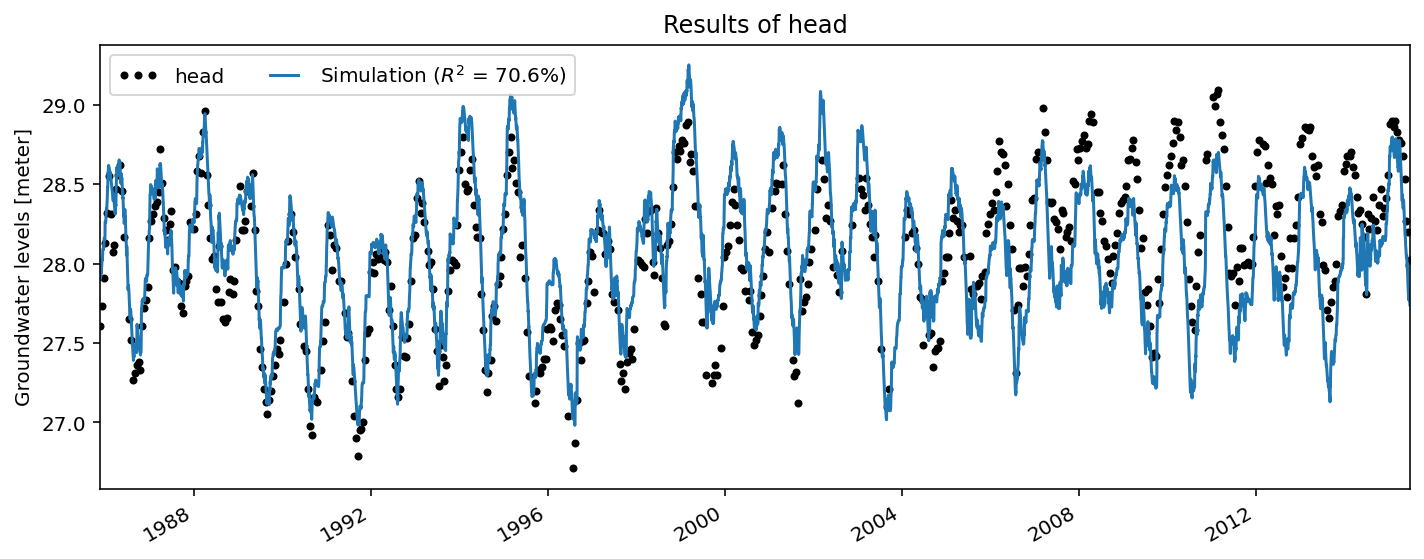

In [5]:
ml.plot(figsize=(10, 4));

In de simulatie is te zien dat het tijdreeksmodel de gemeten stijghoogte redelijk simuleerd. Op basis van een visuele inspectie van deze simulatie is te zien dat voor de periode na 2005 de stijghoogte onderschat wordt door het model. 

Dit is beter zichtbaar in de residuen van de reeks. Deze zijn weergeven in de onderstaande afbeelding. In de periode voor 2005 overschat het model de gemeten stijghoogte (negatieve residuen). In de periode na 2005 maakt het model een onderschatting (positieve residuen). Dit sugereert dat rond 2005 een verandering heeft plaatsgevonden.

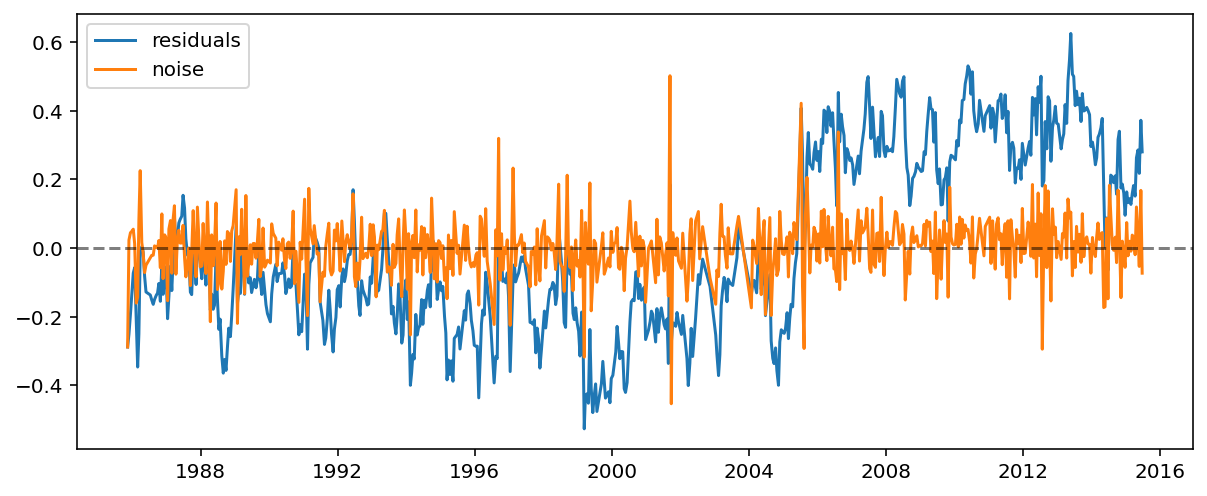

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(ml.residuals(), label='residuals')
ax.plot(ml.noise(), label='noise')
ax.axhline(0, color='k', ls='--', alpha=0.5)
ax.legend();

### Invloed van de ingreep

Het tijdreeksmodel wordt nogmaals opgesteld, met als doel de invloed van de ingreep te bepalen. Ten eerste wordt geprobeerd het model op te stellen met de toevoeging van een stap respons, dit is een instantane sprong van de stijghoogte. Dit kan worden gezien als een verklarende reeks die gelijk is aan 0 (geen effect), voor 1 juni 2005 en gelijk is aan 1 (wel een effect), na 1 juni 2005.

Deze verklarende reeks wordt gebruikt bij het opstellen van het tijdreeksmodel. De stap respons (of sprong) wordt opgelegt op het moment waarop de ingrepen in het gebied zijn ingevoerd, 1 juni 2005. 

In [7]:
# opzetten model
ml = ps.Model(gws)

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Gamma, name='gwa')

sm2 = ps.StepModel(tstart=pd.Timestamp('2005-06-01'),
                   name='stap', rfunc=ps.One, up=None)
ml.add_stressmodel([sm1, sm2])

# oplossen van het tijdreeksmodel
ml.solve(report=False);

Het nieuwe model heeft een R$^2$ van 0.94, dit is significant hoger dan het oude model zonder stap trend met een R$^2$ van 0.71. De simulatie van het nieuwe tijdreeksmodel zijn te zien in de onderstaande afbeelding. 

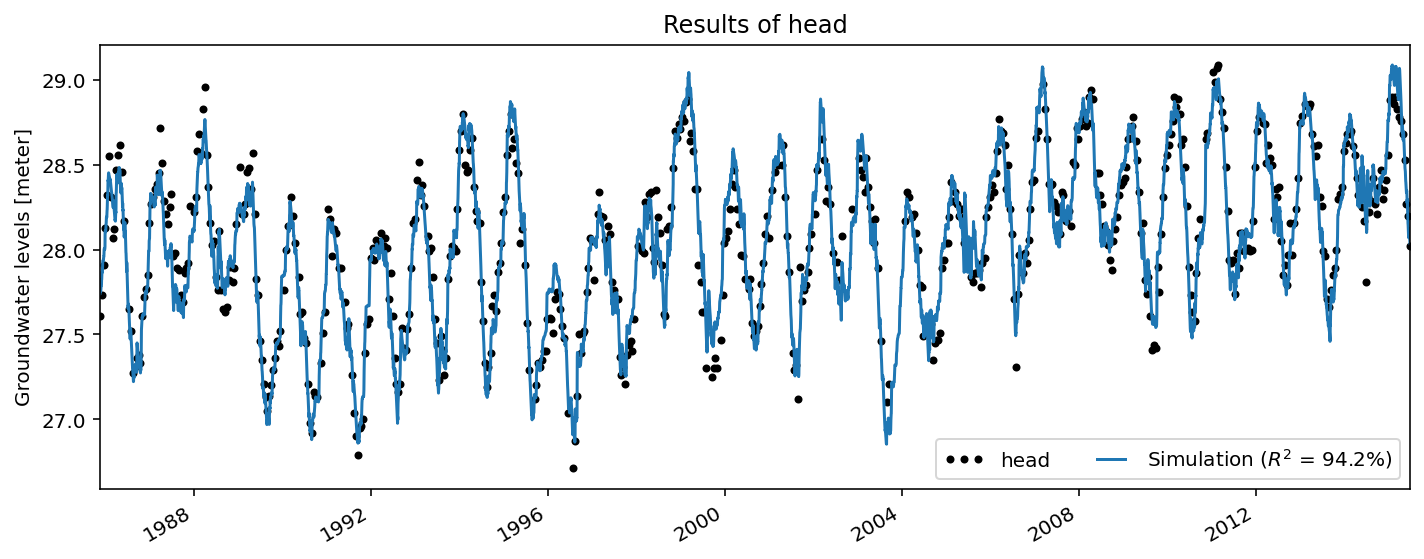

In [8]:
ml.plot(figsize=(10, 4));

Voor het nieuwe model is wenselijk om iets te zeggen over de hoogte van de stap en de onzekerheid daarvan. Om dit te doen moet worden gecontroleerd of de resultaten van het tijdreeksmodel voldoende zijn om de onzekerheid goed in te kunnen schatten. Hiervoor moet het model aan voorwaarden.

Bij het bepalen van de onzekerheid van de modelparameters is de aanname dat de ruis van het model zogenaamde "witte ruis" is. Hiervoor worden vier aannames gecontroleerd:

- het gemiddelde van de ruis is nul;
- de waardes zijn onafhankelijk van elkaar;
- De ruis is normaal verdeeld;
- De ruis heeft een constante variantie.

Als de ruis aan deze toetsen voldoet mag aangenomen worden dat de ruis "witte ruis" betreft en dat de standaard deviatie van de modelparameters juist is ingeschat.

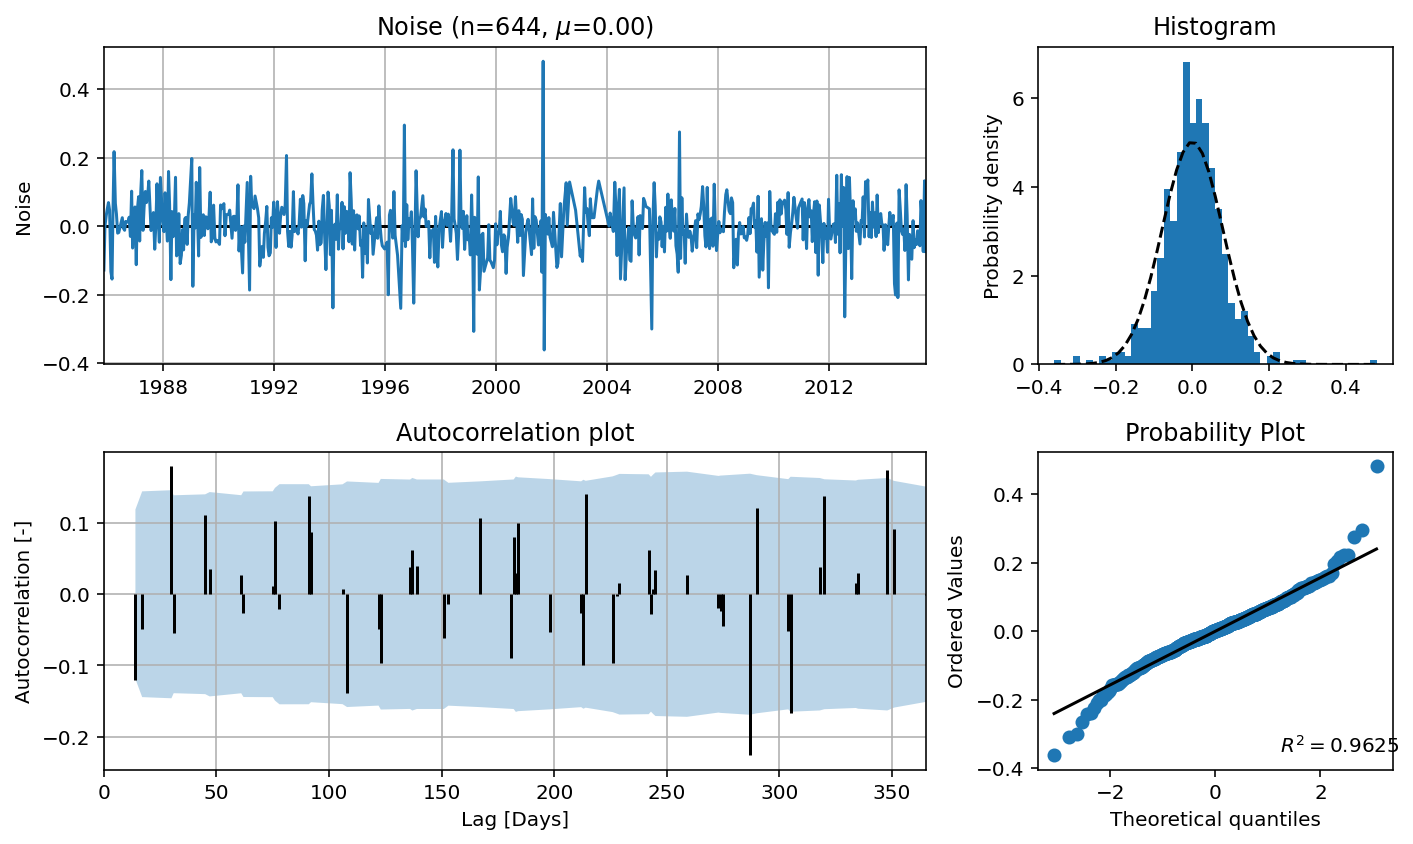

In [9]:
ml.plots.diagnostics();

In de figuur linksboven is de ruis weergeven. Te zien is dat er geen duidelijke trend zichtbaar is en dat de gemiddelde waarde ($\mu$) gelijk is aan 0,00. In de figuur linksonder is de autocorrelatie van de lag weergeven met het bijbehorende 95% zekerheidsinterval. Hiervoor geldt dat 95% vaan de autocorrelatie waardes binnen dit interval moeten liggen. In dit geval voldoet de reeks aan deze toets.

De figuur rechtsboven weergeeft de ruis als verdeling, met een bijbehorende normale verdeling, gefit op de ruis. Deze figuur kan worden gebruikt om te kijken of de ruis aan een normale verdeling voldoet. De figuur rechtsonder kan ook worden gebruikt om de normaliteit te toetsen. In dit geval voldoet de ruis goed aan een normale verdeling.

Op basis hiervan wordt aangenomen dat het gaat om "witte" ruis en dat de onzekerheden van de modelparameters juist zijn ingeschat. Daarom is het mogelijk om de onzekerheid van de stap respons in te schatten. In de onderstaande figuur zijn de uitgebreide resultaten van het tijdreeksmodel weergeven.  

In de figuur zijn de residuen van het nieuwe tijdreeksmodel te zien. Hierin is de sprong in de residuen, die zichtbaar was bij het eerste tijdreeksmodel, niet in meer te zien bij het nieuwe tijdreeksmodel.

De stap die door het tijdreeksmodel wordt berekend is gelijk aan 0.48 meter. Hierbij is het 95% zekerheidsinterval weergeven van de hoogte van de stap. Dit interval is tussen 0.43 en 0.52 m. Dit interval is weergeven in de resultaten.

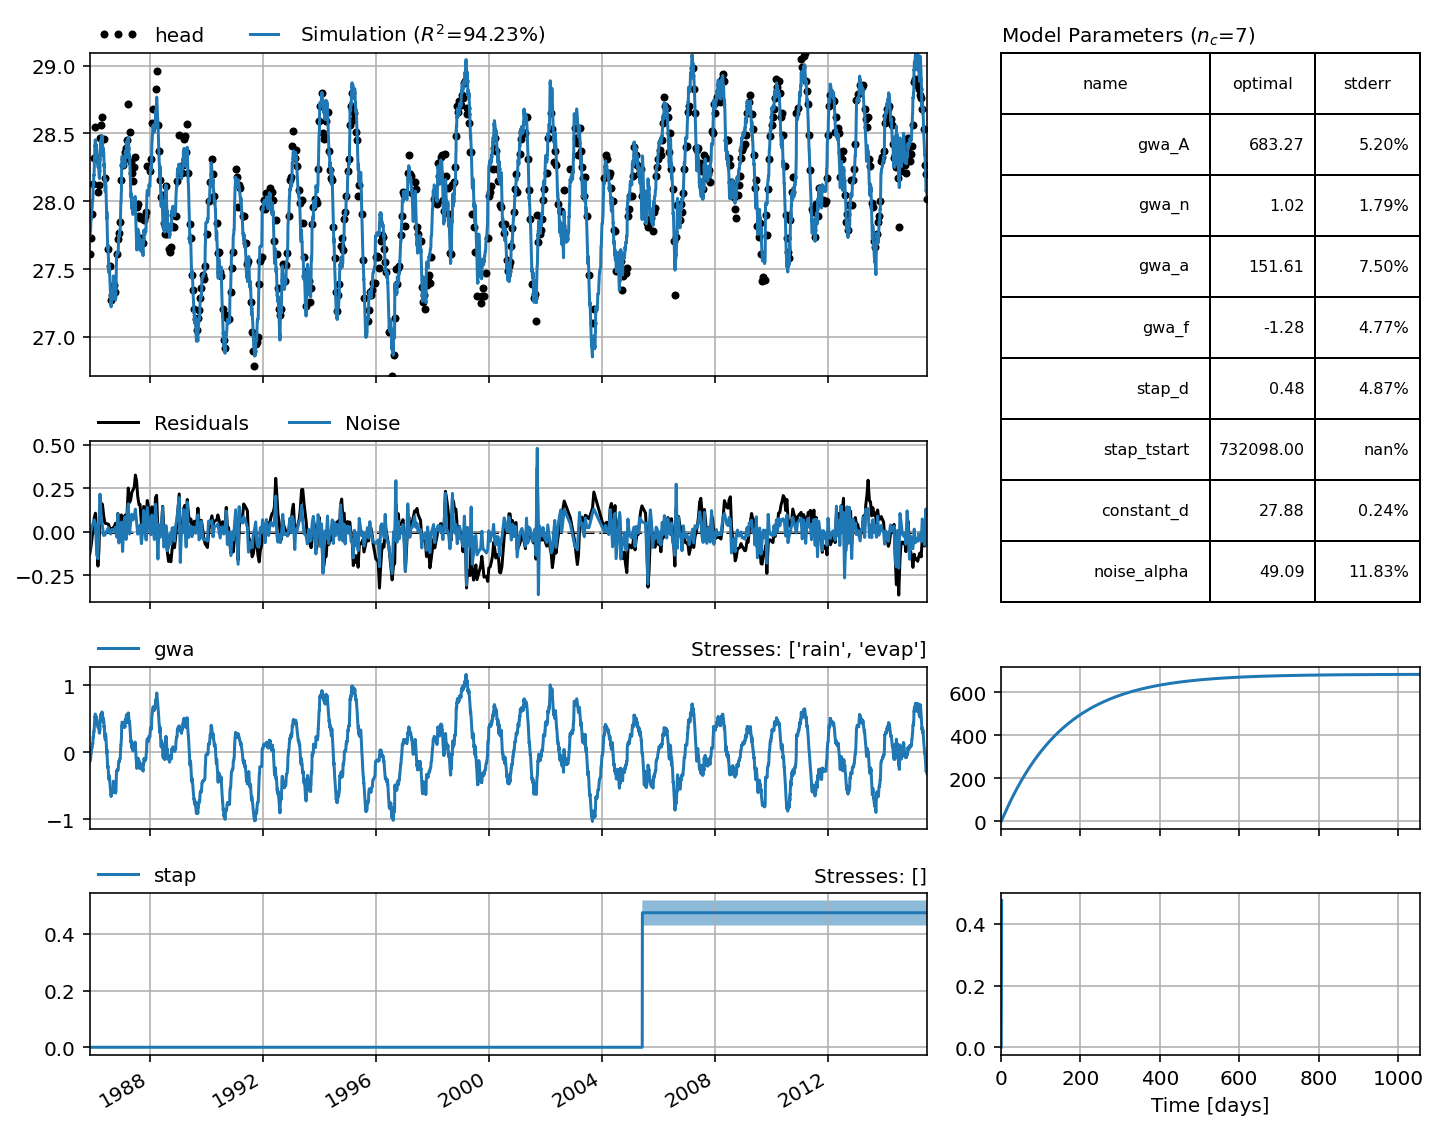

In [10]:
ci = ml.fit.ci_contribution("stap", alpha=0.05)
axes = ml.plots.results(adjust_height=False, figsize=(10, 8))
axes[-3].fill_between(ci.index, ci.iloc[:, 0],
                      ci.iloc[:, 1], zorder=-10, alpha=0.5);

Een tweede methode wordt gebruikt om dezelfde analyse uit te voeren om de effecten van de ingreep te bepalen. Hiervoor worden 2 tijdreeksmodellen opgesteld; een model voor de periode voor dat de ingreep heeft plaatsgevonden (stijghoogtereeks tot mei 2005) en een model voor de periode na de ingrepen (stijghoogtereeks vanaf september 2005). Hierbij worden de neerslag en verdamping als verklarende reeksen gebruikt. Net als bij het vorige tijdreeksmodel wordt de Gamma respons functie gebruikt voor de neerslag en verdamping. Er wordt geen staptrend aan de modellen toegevoegd.

In [11]:
# opzetten model
ml_voor = ps.Model(gws[:'2005-05-01'])

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Gamma, name='gwa')
ml_voor.add_stressmodel(sm1)

# oplossen van het tijdreeksmodel
ml_voor.solve(report=False)

# opzetten model
ml_na = ps.Model(gws['2005-09-01':])

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Gamma, name='gwa')
ml_na.add_stressmodel(sm1)

# oplossen van het tijdreeksmodel
ml_na.solve(report=False);

Met behulp van beide modellen kan de stijghoogte worden gesimuleerd voor een bepaalde periode. Met beide modellen wordt de periode van 1995 tot en met 2015 gesimuleerd, 10 jaar voor en na de ingrepen. In de onderstaande figuur zijn beide simulaties weergeven, daarnaast is ook het verschil tussen beide simulaties berekend voor deze periode.

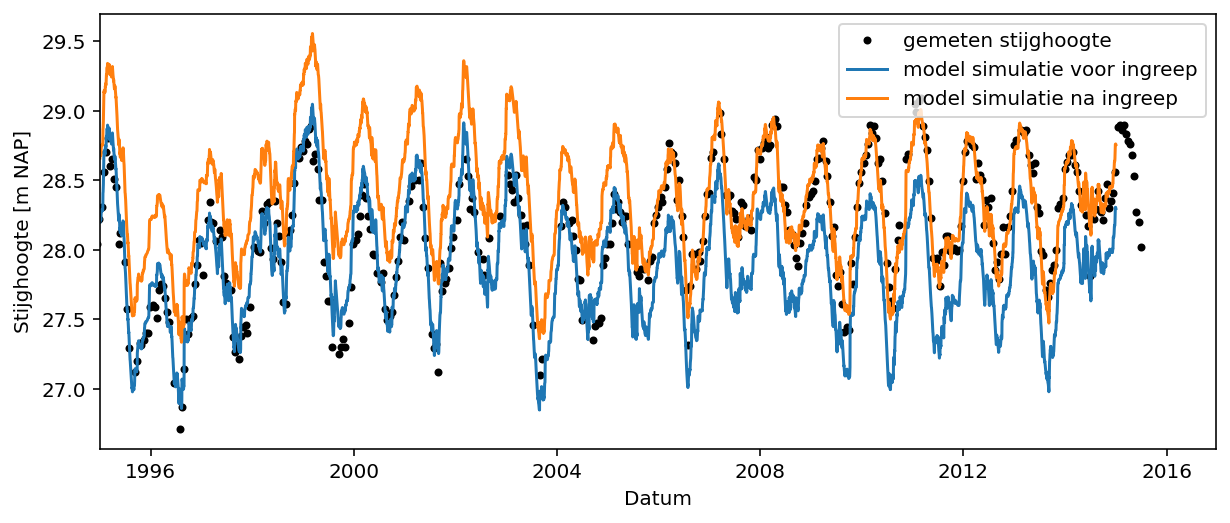

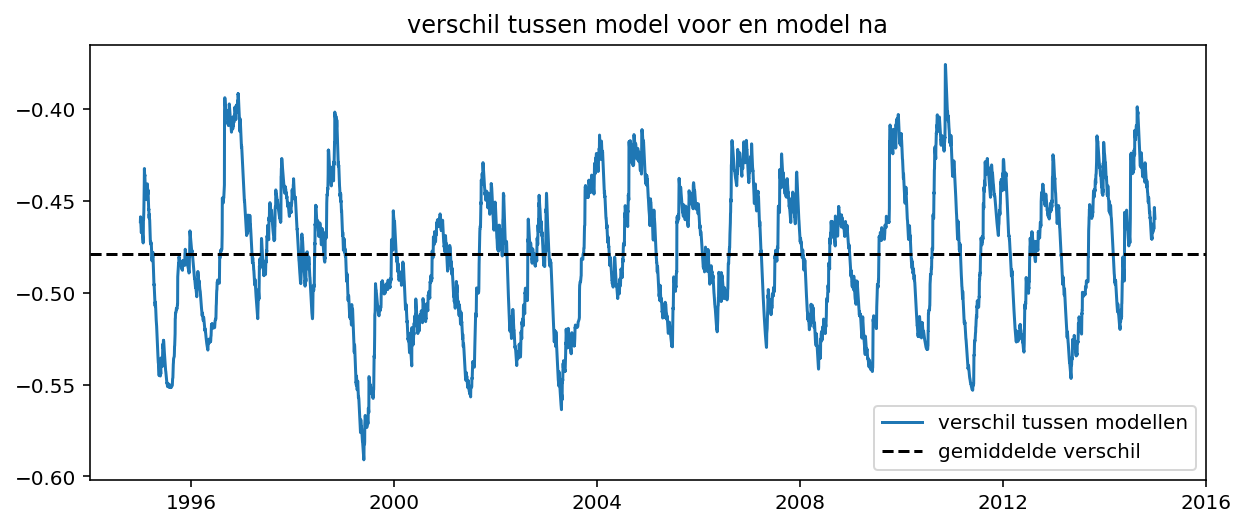

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(gws, marker='.', color='k', ls='', label='gemeten stijghoogte')
ax.plot(ml_voor.simulate(tmin='1995', tmax='2015'),
        label='model simulatie voor ingreep')
ax.plot(ml_na.simulate(tmin='1995', tmax='2015'),
        label='model simulatie na ingreep')

# opmaken van de figuur
ax.set_ylabel('Stijghoogte [m NAP]')
ax.set_xlabel('Datum')
ax.set_xlim(xmin=pd.Timestamp('1995'))
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot((ml_voor.simulate(tmin='1995', tmax='2015') - 
         ml_na.simulate(tmin='1995', tmax='2015')),
        color='C0', label='verschil tussen modellen')
ax.axhline((ml_voor.simulate(tmin='1995', tmax='2015') - 
            ml_na.simulate(tmin='1995', tmax='2015')).mean(),
           color='k', ls='--', label='gemiddelde verschil')
ax.legend()
ax.set_title('verschil tussen model voor en model na');

Zoals te zien is het verschil tussen beide modellen tussen de 0.4 en 0.6 meter. Het gemiddelde verschil is 0.48 meter. Dit komt overeen met de bevindingen van het tijdreeksmodel met de stap respons functie, hiermee kan deze model conclusie worden ondersteund. Hierbij moet wel worden opgemerkt dat bij de tweede analyse geen rekening is gehouden met de onzekerheden in het model.

## Deel II: Invloed waterloop

Het waterschap heeft nabij een grote waterloop een peilbuis staan om de stijghoogte in het gebied te monitoren. Het is bij de beheerder van het gebied bekent dat de waterstand in de waterloop sterk aan elkaar zijn gecorreleerd. 

In de zomer van 2018 is de stijghoogte door de droogte sterkt gedaald. Om dit in de toekomst te voorkomen wordt gekeken of het verhogen van de waterstanden in de waterloop hier een oplossing voor kan zijn. De hydroloog van het waterschap wil bepalen hoe de stijghoogte in het gebied reageert op veranderingen van de waterstand in de waterloop.

### Beschikbare data voorbeeld 2

De stijghoogte is gemeten voor de periode van 2000 tot 2020. De gemeten stijghoogte is  weergeven in de onderstaande afbeelding. Te zien is dat in de zomer van 2018 de stijghoogte sterk is gedaald.  

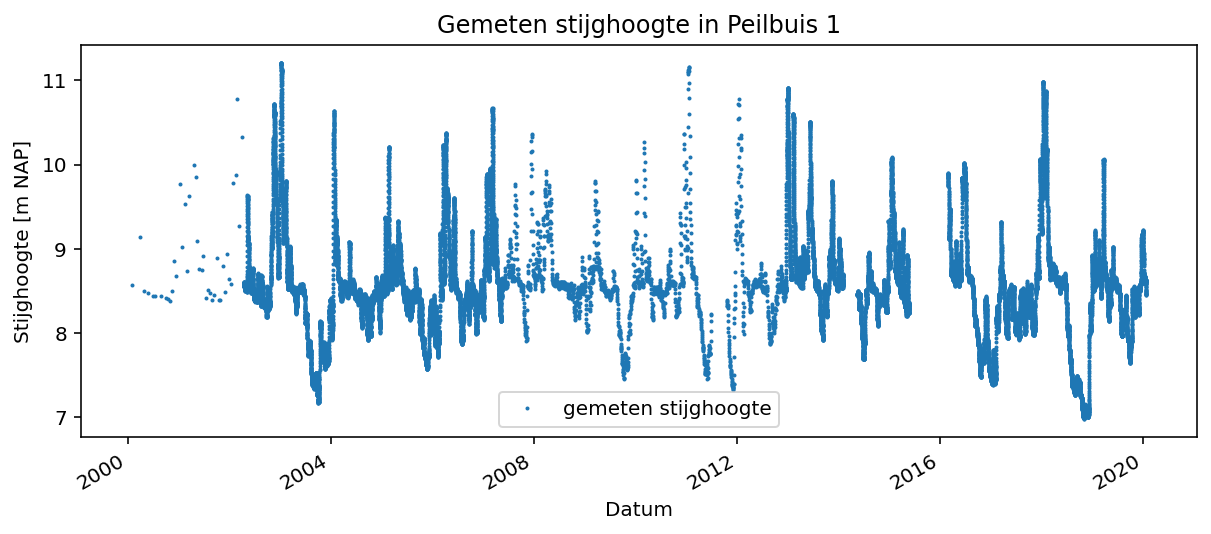

In [13]:
gws = pd.read_csv("data/head_rivex.csv",
                  index_col="Date", parse_dates=True)

# plotten van de stijghoogte
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
gws.plot(ax=ax, color='C0', ls='', marker='.', markersize=2)

# opmaken van de figuur
ax.set_ylabel('Stijghoogte [m NAP]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten stijghoogte in Peilbuis 1')
ax.legend([f'gemeten stijghoogte']);

Nabij het gebied zijn de neerslag en verdampingsgegevens opgehaald van het dichtsbijzijnde KNMI weerstation. De neerslag en verdamping zijn weergeven in de onstaande afbeelding. 

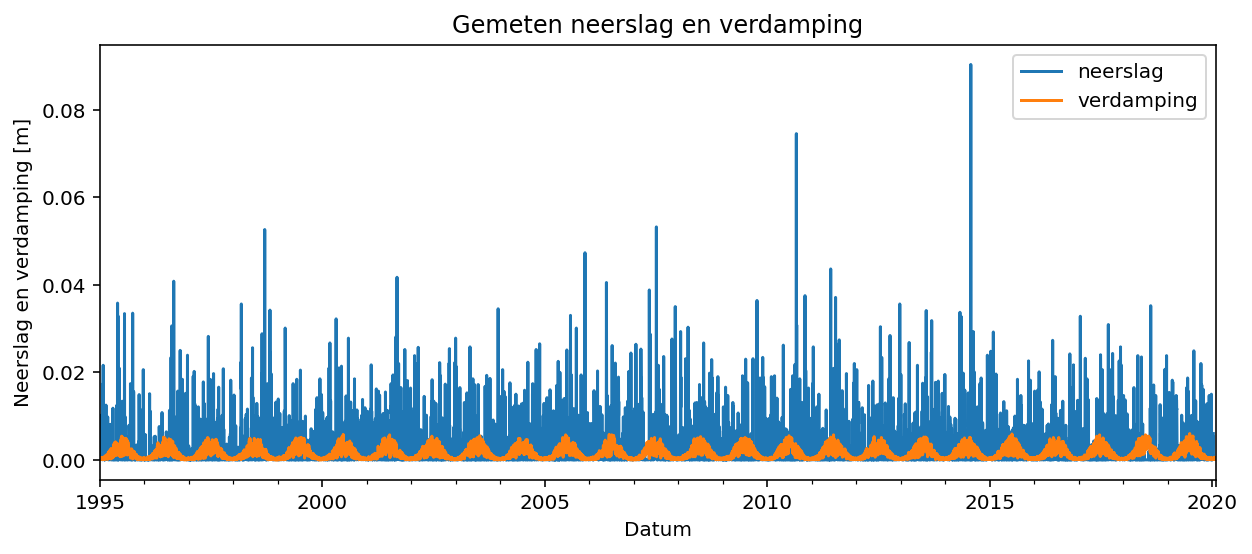

In [14]:
neerslag = pd.read_csv("data/prec_rivex.csv",
                       index_col="Date", parse_dates=True)
verdamping = pd.read_csv("data/evap_rivex.csv",
                         index_col="Date", parse_dates=True)

# plotten van de neerslag en verdamping
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
neerslag.plot(ax=ax, color='C0')
verdamping.plot(ax=ax, color='C1')

# opmaken van de figuur
ax.set_ylabel('Neerslag en verdamping [m]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten neerslag en verdamping')
ax.legend([f'neerslag',
          f'verdamping'])
ax.set_xlim(xmin='1995');

Naast de neerslag en verdamping wordt voor het tijdreeksmodel de waterstand in de waterloop gebruikt als verklarende reeks. In de waterloop is door het waterschap de waterstand gemeten voor de periode 1995 tot 2020. De variatie in waterstand ten opzichte van het streefpeil is te zien in de onstaande figuur. In de meetreeks is te zien dat de waterstand in de zomer van 2018 erg laag was, ca. 2 meter onder het streefpeil. 


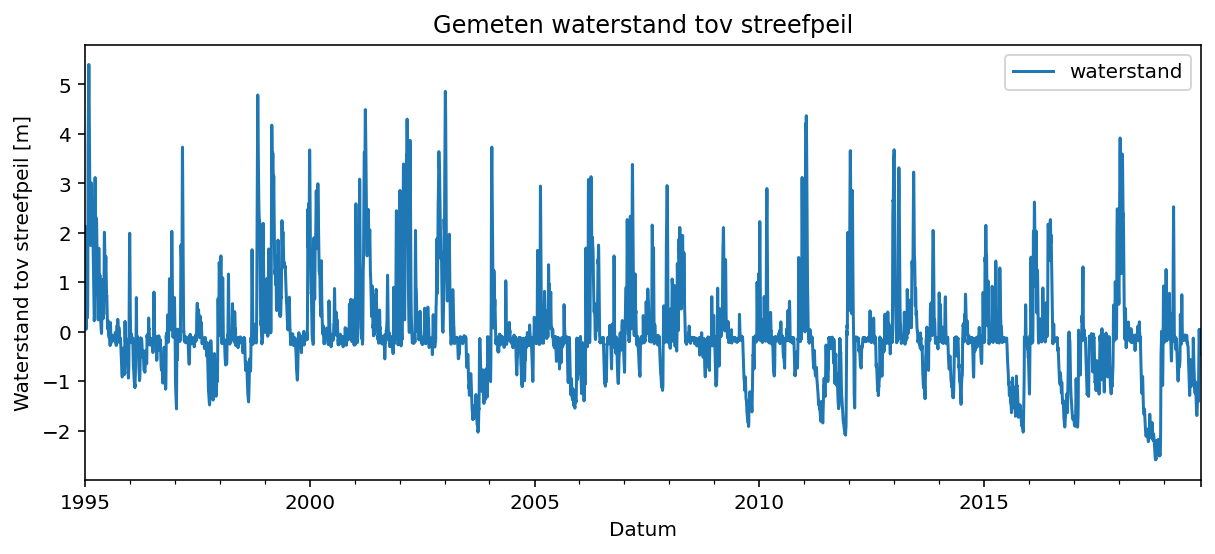

In [15]:
waterlevel = pd.read_csv("data/waterlevel_rivex.csv",
                         index_col="Date", parse_dates=True)

# plotten van het waterlevel
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
waterlevel.plot(ax=ax, color='C0')

# opmaken van de figuur
ax.set_ylabel('Waterstand tov streefpeil [m]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten waterstand tov streefpeil')
ax.legend([f'waterstand'])
ax.set_xlim(xmin='1995');

### Voorbewerken reeksen voorbeeld 2

De gemeten stijghoogte heeft een meetfrequentie van eens per 3 uur. De meetreeks van het waterniveau in de waterloop heeft een meetfrequentie van eens per dag, net als de neerslag en de verdamping. Hierom wordt de meetreeks van de stijghoogte geresampled naar een frequentie van eens per dag. Hiervoor wordt de gemiddelde stijghoogte per dag genomen bij het resampelen van de meetreeks.

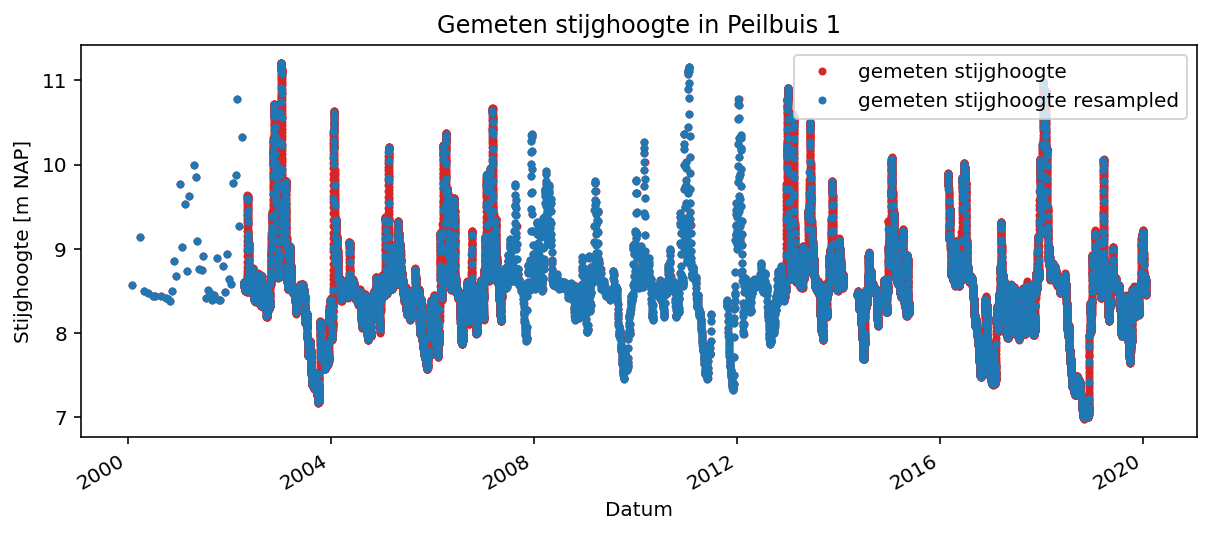

In [16]:
gws_r = gws.resample("D").mean().dropna()

# plotten van de stijghoogte
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
gws.plot(ax=ax, color='C3', ls='', marker='.')
gws_r.plot(ax=ax, color='C0', ls='', marker='.')

# opmaken van de figuur
ax.set_ylabel('Stijghoogte [m NAP]')
ax.set_xlabel('Datum')
ax.set_title('Gemeten stijghoogte in Peilbuis 1')
ax.legend([f'gemeten stijghoogte', 'gemeten stijghoogte resampled']);

### opzetten model voorbeeld 2

Met de bewerkte meetreeks wordt een tijdreeksmodel opgezet voor de periode vanaf 2000. Eerst is een model opgesteld met enkel neerslag en verdamping als verklarende reeksen. Voor deze reeksen is de Exponential responsfunctie gekozen voor zowel de neerslag en verdamping. 


In [17]:
# opzetten model
ml = ps.Model(gws_r.loc["2000-01-01":])

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Exponential, name='gwa')
ml.add_stressmodel(sm1)

# oplossen van het tijdreeksmodel
ml.solve(report=False);

In de onderstaande afbeelding is de gesimuleerde stijghoogte weergeven. Te zien is dat het tijdreeksmodel geen goede verklaring geeft voor de gemeten stijghoogte. Het model is niet in staat om de variatie in stijghoogte te simuleren.

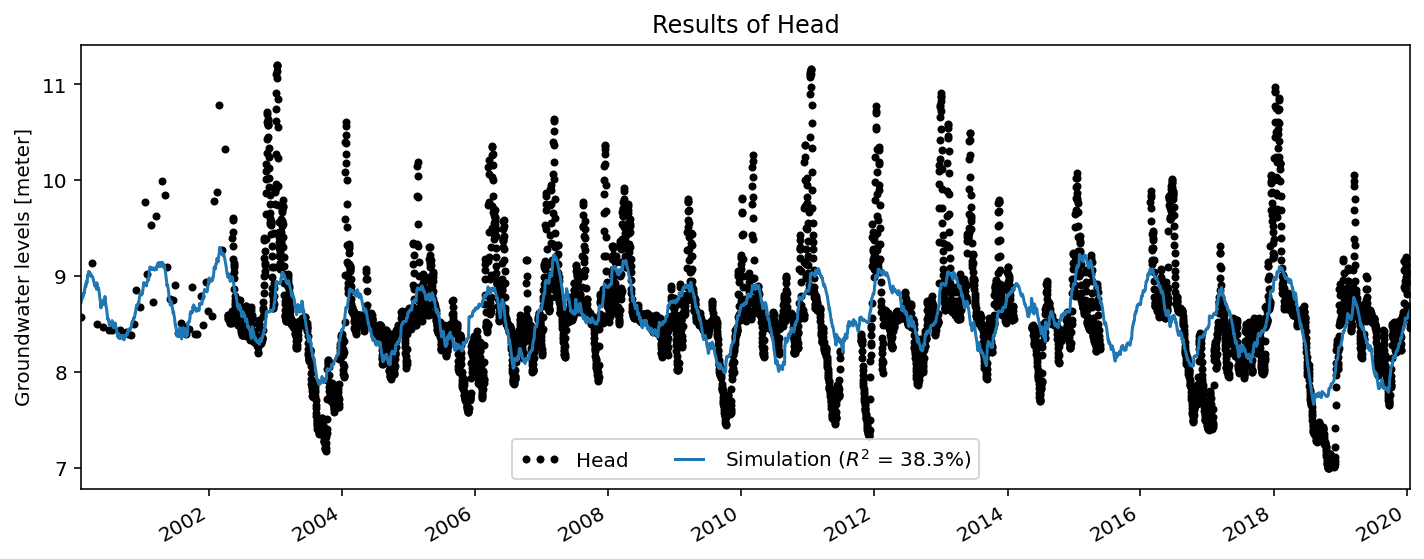

In [18]:
ml.plot(figsize=(10, 4));

Er wordt nogmaals een tijdreeksmodel opgesteld, nu met de toevoeging van de gemeten waterstand in de waterloop als verklarende reeks. Voor deze verklarende reeks worden de Gamma respons gekozen als responsfunctie.

De variatie van het waterpeil is ca. 6 a 7 meter, de variatie van de stijghoogte is ca. 4 meter. Omdat de stijghoogte sterk afhankelijk lijkt te zijn van de waterstand in de waterloop kan op basis van deze visuele inspectie een inschatting te maken van de reactie van de stijghoogte op de waterloop. Naar verwachting zal deze rond de 57% tot 66% zijn (tussen de 4/6 en 4/7). 


In [19]:
# opzetten model
ml2 = ps.Model(gws_r.loc["2000-01-01":])

# toevoegen van neerslag en verdamping als verklarende reeksen
sm1 = ps.RechargeModel(neerslag, verdamping, rfunc=ps.Exponential, name='gwa')

sm2 = ps.StressModel(stress=waterlevel, rfunc=ps.Gamma,
                     name='waterlevel', settings='waterlevel')
ml2.add_stressmodel([sm1, sm2])

# oplossen van het tijdreeksmodel
ml2.solve(report=False)

In de onderstaande afbeelding is de simulatie van het tijdreeksmodel te zien. Hierbij is te zien dat het tijdreeksmodel de gemeten stijghoogte significant beter simuleerd dan het tijdreeksmodel zonder het waterniveau in de waterloop. De R$^2$ van dit tijdreeksmodel is 0.93 ten opzichte van 0.38 van het eerste model. Hierin is ook te zien dat het tijdreeksmodel de stijghoogte in de zomer van 2018 goed inschat. 

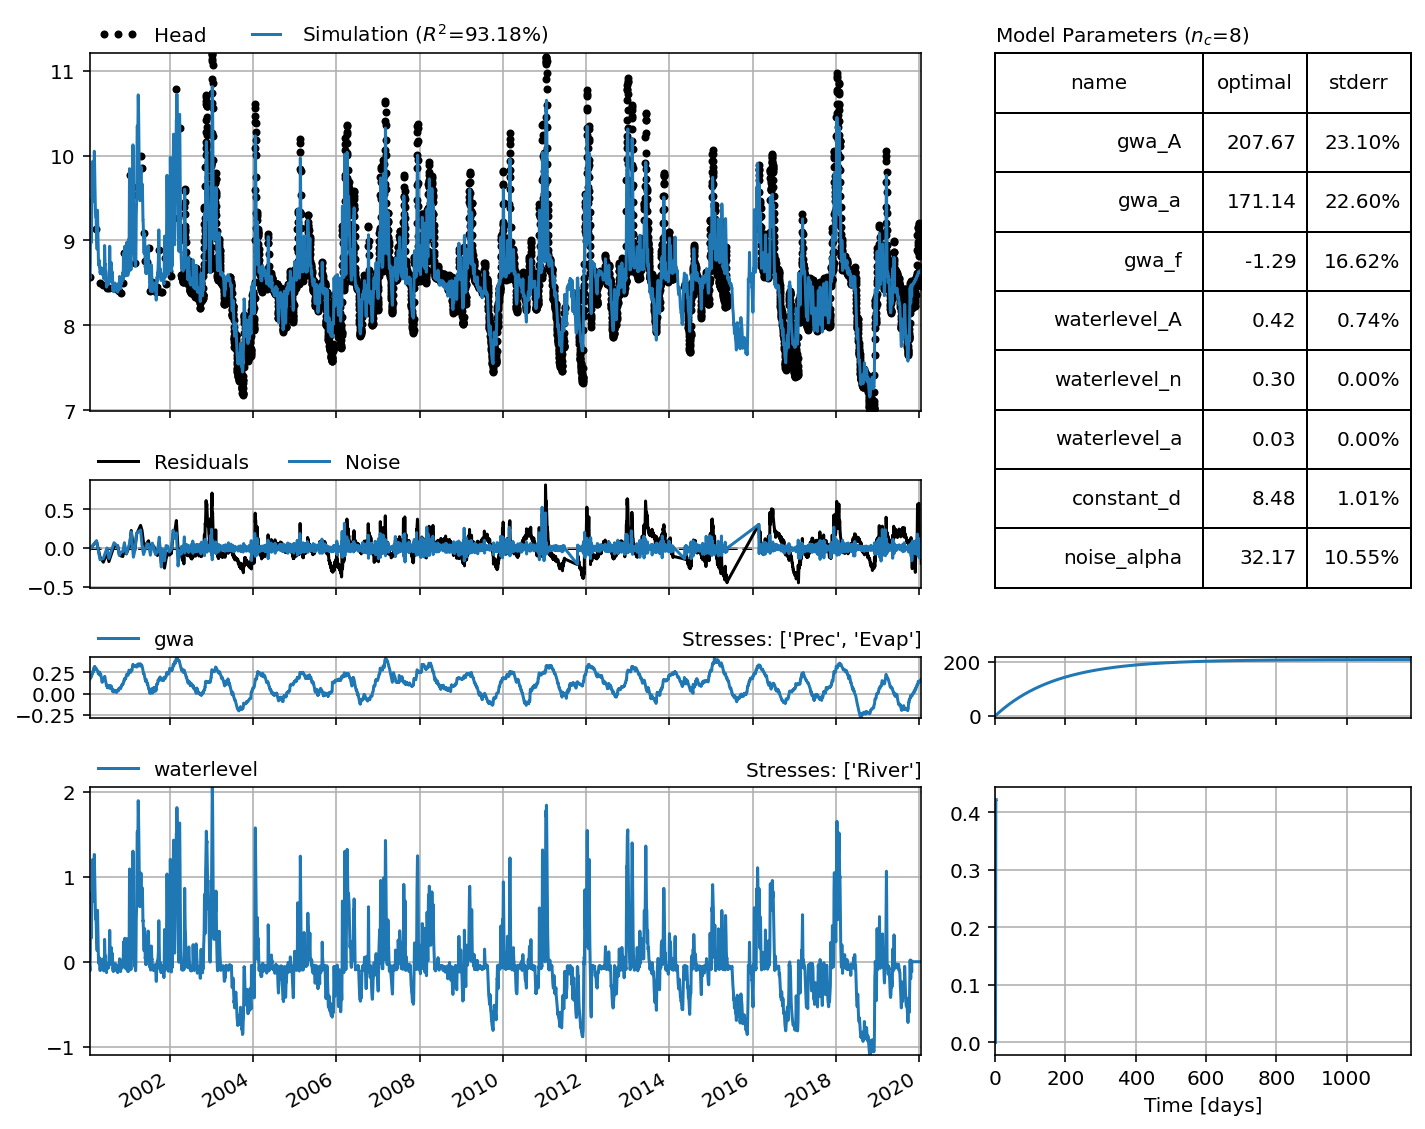

In [20]:
ml2.plots.results(figsize=(10, 8));

### Bepalen invloed van waterloop

In de onderstaande figuur zijn de bijdrage van de verklarende reeksen aan de gemeten stijgoohte weergeven. Hierbij is te zien dat de variatie in waterstand zorgt voor een bijdrage van ca. -2 tot 2 m op de gemeten stijghoogte. De waterloop levert de grootste bijdrage aan de variatie van de stijghoogte. De neerslag en verdamping hebben een geringe invloed op de gemeten stijghoogte.

De stationaire waarde van de respons van de onttrekking is gelijk aan 0.57 meter, dit betekent dat de stijghoogte 0.57 meter stijgt bij een waterstandsverhoging van 1 m in de waterloop. Dit komt goed overeen met het beeld wat vooraf werd afgeleid uit de visuele inspectie van de reeks. Hierbij moet wel worden opgemerkt dat in dit geval geen onzekerheid van de hoogte van de respons is bepaald.

Met deze informatie kan de hydroloog het Waterschap adviseren. Uit het tijdreeksmodel blijkt dat de waterloop een significante invloed heeft op de stijghoogte in het gebied. Daarnaast kan met behulp van het tijdreeksmodel een inschatting worden gemaakt van de toelaatbare verlaging van de waterstand in de waterloop voordat de stijghoogte onder een niveau komt waarbij droogteschade ontstaat in het gebied waar de peilbuis zich bevind. 

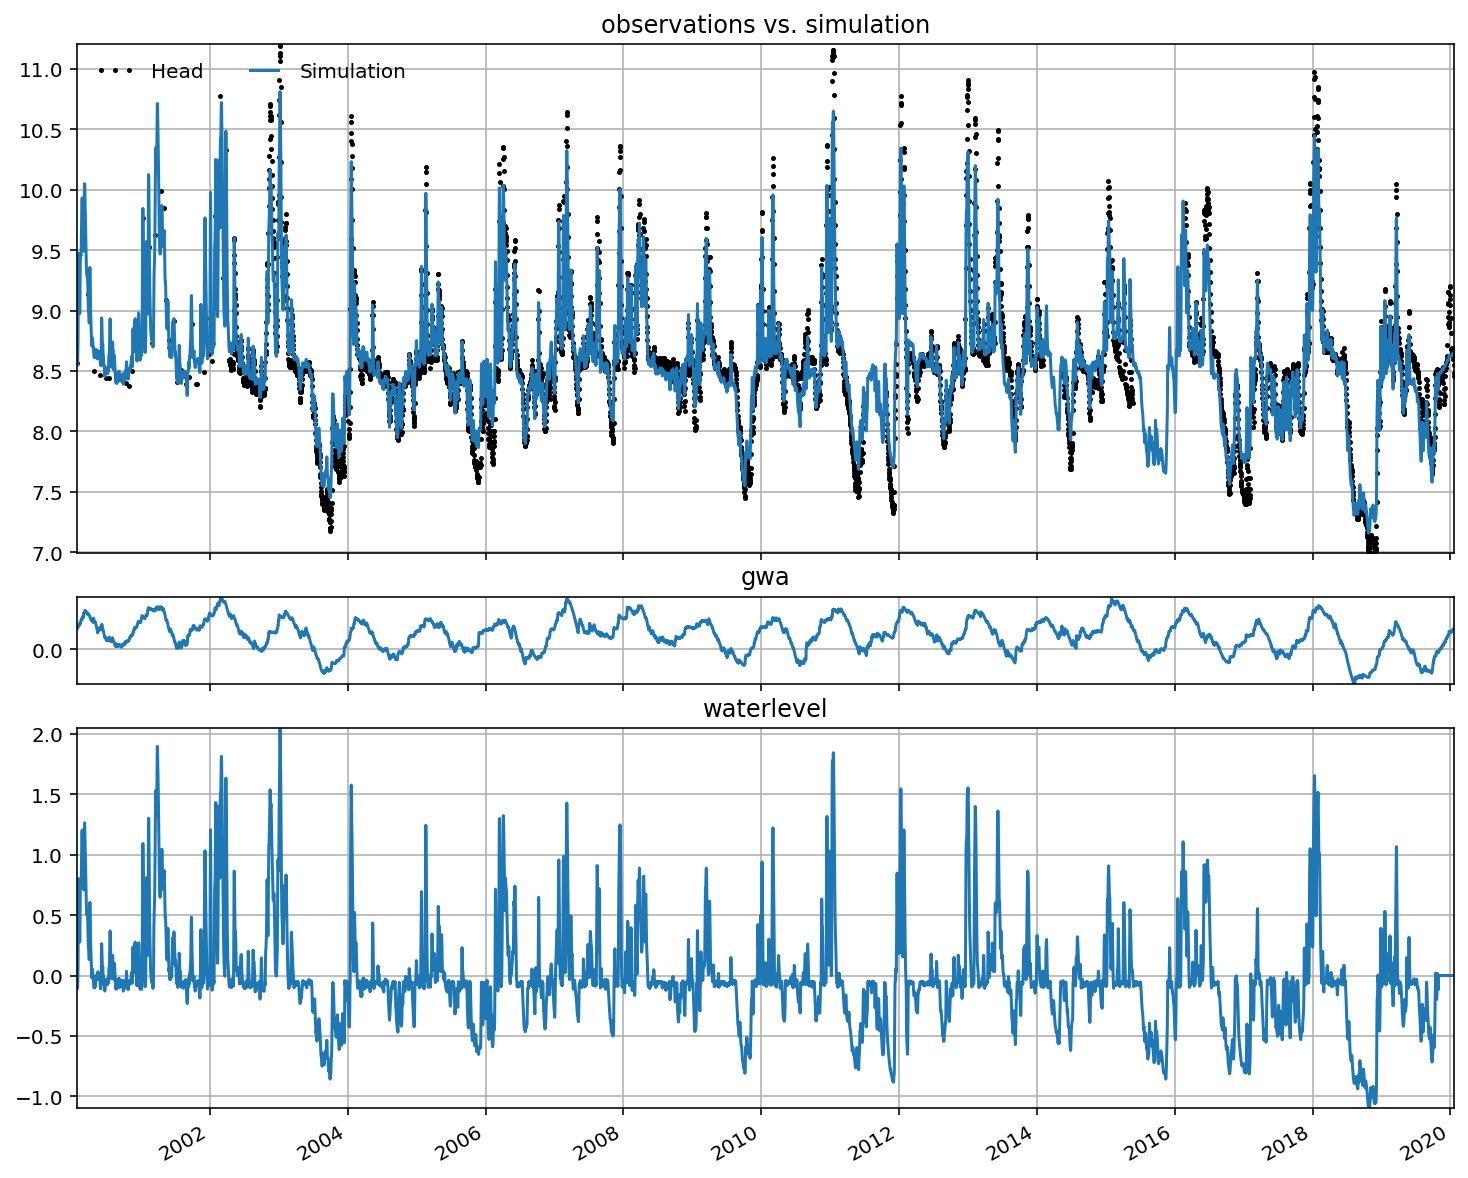

In [21]:
ml2.plots.decomposition(split=False, figsize=(10, 8));